# Analyzing the NYC Subway Dataset
### Project 2 of the Data Analyst Nanodegree
October, 14th 2015 - Daniel Pöhle 

----------
##Questions

###Overview
This project consists of two parts. In Part 1 of the project, you should have completed the questions in Problem Sets 2, 3, and 4 in the Introduction to Data Science course.
This document addresses part 2 of the project. Please use this document as a template and answer the following questions to explain your reasoning and conclusion behind your work in the problem sets. You will attach a document with your answers to these questions as part of your final project submission.



###Section 0. References

Please include a list of references you have used for this project. Please be specific - for example, instead of including a general website such as stackoverflow.com, try to include a specific topic from Stackoverflow that you have found useful.

- https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
- http://blog.yhathq.com/posts/facebook-ggplot-tutorial.html
- http://ggplot.yhathq.com/docs/index.html
- http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
- http://blog.yhathq.com/posts/aggregating-and-plotting-time-series-in-python.html

In [1]:
import datetime
import pandas as pd
import pandasql as pdsql
import datetime as dt
import numpy as np
import scipy as sc
import scipy.stats
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from ggplot import *
%matplotlib inline

###Section 1. Statistical Test

####1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

We want to determine, if the number of subway riders is dependent on the weather condition (rainy vs. non rainy days). The shape of the two samples of passengers on rainy and non rainy days does not look like a normal distribution (see figure in section 3.1). Hence, the Welch's t-test cannot be applied. Instead of that, we use the Mann-Whitney-Wilcoxon RankSum test (which makes no assumptions about any underlying distributions and is equivalent to Mann-Whitney-U test, see [here](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)) to test if the two samples of the number of riders in the NYC subway on rainy and non rainy days come from the same population.

Null Hypothesis H0: The sample of the number of entries in the NYC subway on rainy days $F_{rain}(x)$ comes from the identical ditribution of the population as the sample for non rainy days $F_{no-rain}(x-a)$ with $a = 0$. Hence, the means are the same.

Alternative Hypothesis H1: The samples have not the identical underlying distribution of the population, hence there is a shift between the means and $a \neq 0$.

We use a two-tail p-value, because we will reject the null hypothesis if the difference of means is too big in any direction. The p critical value is $\alpha = 5\%$.

####1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

The Mann-Whitney-Wilcoxon RankSum test (equivalent to Mann-Whitney-U test) is applicable, because the assumptions about the underlying distributions are met:
- No specific shape of the distribution of the population is assumed, in particular it is not assumed to be the normal distributed
- The observations from both samples are independent of each other
- The observations are ordinal, you can compare two numbers of riders
- We test in difference of mean and assume that both samples have the same variance in their population

####1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.




The null hypothesis has to be rejected, because the calculated p-value of 5.482e-06 is less than $\alpha = 5\%$. Consequently, it is very unlikely that the observed difference of the means in both samples occured only by chance if they came from the same population. That is why the null hypothesis is rejected. The number of subway riders will be higher if it is a rainy day.

| variable  | value  |   
|:-:|:-:|
| test statistic $z$  | -4.545  |
| p-value  | 5.482e-06  |
| mean of riders on rainy days  | 2028.2  |
| mean of riders on non rainy days  | 1845.5  |

The calculations of the statistical test can be found in section A.3.




####1.4 What is the significance and interpretation of these results?

The results from the statistical test are highly significant, because the calculated p-value is considerably smaller than the p-critical calue of 5%. Hence, the weather conditions (rain or no rain) seems to have an influence on the total numbe of riders in the NYC subway and this effect is very unlikely to be appeared only by chance. As a consequence, the information of rain or no rain will be included as a feature into the linear regression model to predict the number of subway riders in section 2.

###Section 2. Linear Regression

####2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model?
- OLS using Statsmodels

The calculations of the linear regression can be found in section A.3.

####2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?
The following features are included into the linear model to predict the number of NYC subway riders:
- rain
- UNIT (as dummy variables)
- hour (as dummy variables)
- week_day (as dummy variables)


####2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model.

Based on the results of the statistical analysis, the feature 'rain' is included, because the weather conditions seems to have an influence on the number of subway riders. Including the 'UNIT' als a feature with dummy variables increased the coefficient of determination $r^{2}$ considerably. The 'UNIT' represents different measuring points at different subway stations and it is plausible that the number of subway riders (represented by the number of entries) varies from station to station in the subway network. The exploratory plots of ridership by time-of-day and day-of-week (see section 3.2) suggest that there are significant differences in the number of subway riders both on different times of the day and during the week. Both findings are plausible, too. Over the day there are peak hours where people commute from home to work, for example. On the other hand, on weekends there are other purposes to travel by subway than during the weekdays. During the weekdays, people got to work and school, where on weekends people go to leisure activities or stay home. 


####2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?
The parameter for the non dummy feature 'rain' is $\theta_{rain} =39.57$. If it is a rainy day, the number of subway riders will be increasing by around 40 persons (having all other input features constant). The coefficient is consistent to the observed higher mean on rainy days in the samples (see table of the statisitcal test in section 1.3).


####2.5 What is your model’s R2 (coefficients of determination) value?
The coefficient of determination $r^{2} = 0.544$

####2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?



The linear model including the features 'rain', 'UNIT', 'hour' and 'week_day' explains around 54% of the total observed variance. A satisfying value for goodnes of fit would be above 0.80. Predictions of this linear model are suitable to only a limited extent and can only be a very rough estimate. In Section A.5 the predictions are compared with the actuals values. It is obvious, that the data points scatter a lot around the ideal prediction line of $y = x$

###Section 3. Visualization

Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.





####3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.
You can combine the two histograms in a single plot or you can use two separate plots.
If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case.
For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval.
Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.

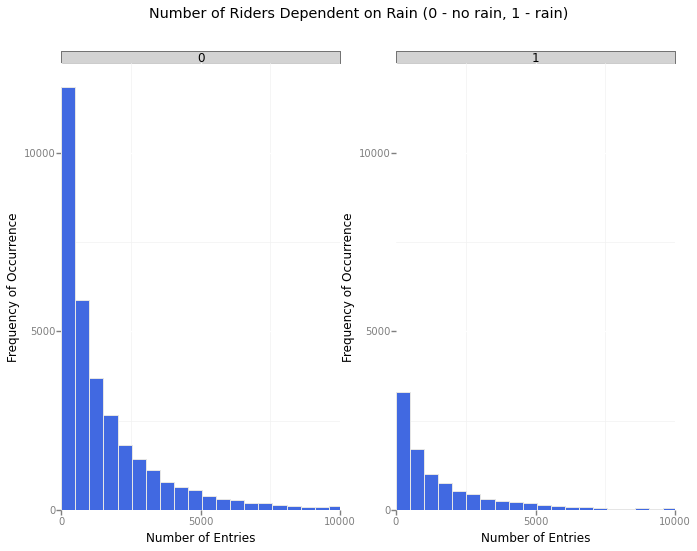

<ggplot: (148761593)>

In [88]:
p = ggplot(aes(x = 'ENTRIESn_hourly'), data=weather_data)
p + geom_histogram(fill = 'royalblue', binwidth = 500) + theme_bw() + facet_wrap('rain', nrow = 1) + \
    scale_x_continuous(limits = [0,10000]) + scale_y_continuous(limits = [0,12500]) + \
    ggtitle("Number of Riders Dependent on Rain (0 - no rain, 1 - rain)") + \
    xlab("Number of Entries") + ylab("Frequency of Occurrence")

**Key Insights:** The distribution of the samples are not normally distributed. The total number of observations on non rainy days is about three times higher than the number of observations on rainy days.

####3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:
- Ridership by time-of-day
- Ridership by day-of-week

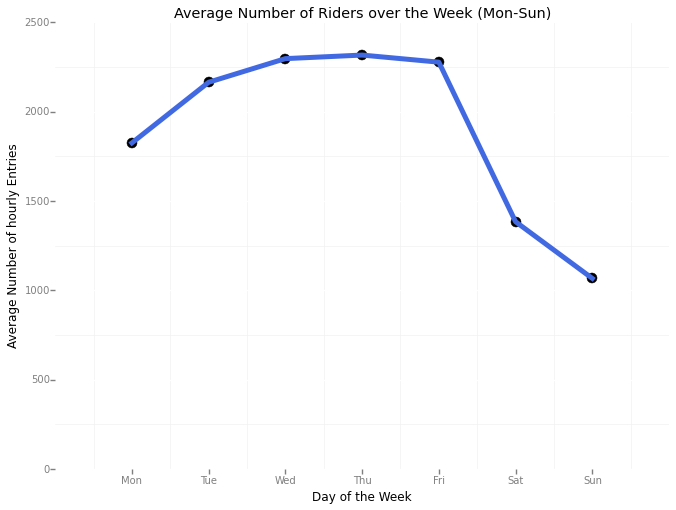

<ggplot: (81084308)>

In [26]:
ts = weather_data.set_index(['day_week'])
ts2 = ts.groupby(ts.index).mean()
ts2 = ts2.reset_index()
p = ggplot(aes(x = 'day_week', y = 'ENTRIESn_hourly'), data=ts2)
p + geom_point(color = 'black', size = 100) + theme_bw() + \
    scale_x_continuous(limits = [-1,7], breaks = [0,1,2,3,4,5,6], labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]) +\
    ggtitle("Average Number of Riders over the Week (Mon-Sun)") + scale_y_continuous(limits = [0,2500]) +\
    xlab("Day of the Week") + ylab("Average Number of hourly Entries") + geom_line(color = 'royalblue', size = 5)

**Key Insights:** During the weekdays the number of riders in the NYC subway are considerably higher than on weekends. Monday is the weakest day of all weekdays. Sunday has only about 50% of the riders on Wednesday, Thursday or Friday. 

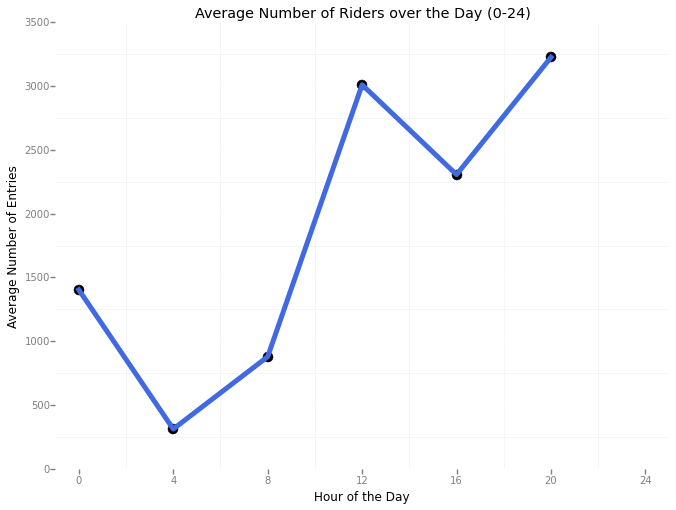

<ggplot: (85628694)>

In [27]:
ts = weather_data.set_index(['hour'])
ts2 = ts.groupby(ts.index).mean()
ts2 = ts2.reset_index()
p = ggplot(aes(x = 'hour', y = 'ENTRIESn_hourly'), data=ts2)
p + geom_line(color = 'royalblue', size = 5) + theme_bw() + \
    scale_x_continuous(limits = [-1,25], breaks = [0,4,8,12,16,20,24]) +\
    ggtitle("Average Number of Riders over the Day (0-24)") + scale_y_continuous(limits = [0,3500]) +\
    xlab("Hour of the Day") + ylab("Average Number of Entries") + geom_point(color = 'black', size = 100)

**Key Insights:** Over the day the number of subway riders changes considerably. Least persons on average ride during the night at 4am, the most subway riders were detected on 12am and 8pm. 

###Section 4. Conclusion

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

####4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?  

####4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.

###Section 5. Reflection

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

####5.1 Please discuss potential shortcomings of the methods of your analysis, including:
- Dataset,
- Analysis, such as the linear regression model or statistical test

####5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?

## Data Analysis and Source Code

### A.1 Import NYC Subway Data

In [2]:
weather_data = pd.read_csv("turnstile_weather_v2.csv")
weather_data["hour"] = weather_data["hour"].astype('category')
weather_data["rain"] = (weather_data["rain"]).astype('category')
weather_data["fog"] = (weather_data["fog"]).astype('category')
weather_data["datetime"] = pd.to_datetime(weather_data["datetime"], '%Y-%M-%D %H:%M:%S') 
weather_data.head(5)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


In [15]:
print list(weather_data.columns.values)

['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station', 'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain', 'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi', 'meanwspdi', 'weather_lat', 'weather_lon']


### A.2 Exploratory Data Analysis for Features
#### a) Number of Riders over the Day Dependent on Rain

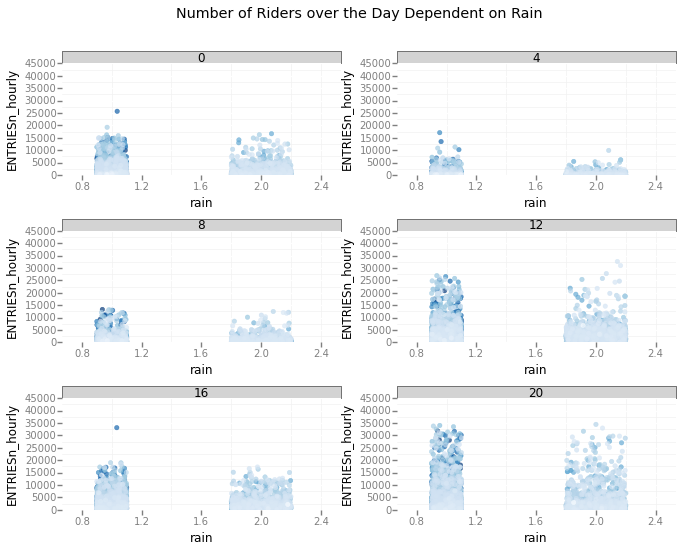

<ggplot: (43556500)>

In [24]:
p = ggplot(aes(x = 'rain', y='ENTRIESn_hourly', color = "meantempi"), data=weather_data)
p + geom_point(position = "jitter", alpha = 0.7) +  scale_y_continuous(limits = [0,45000]) + \
    facet_wrap('hour') + ggtitle("Number of Riders over the Day Dependent on Rain") + theme_bw()

#### b) Number of Riders over the Day Dependent on Weekday

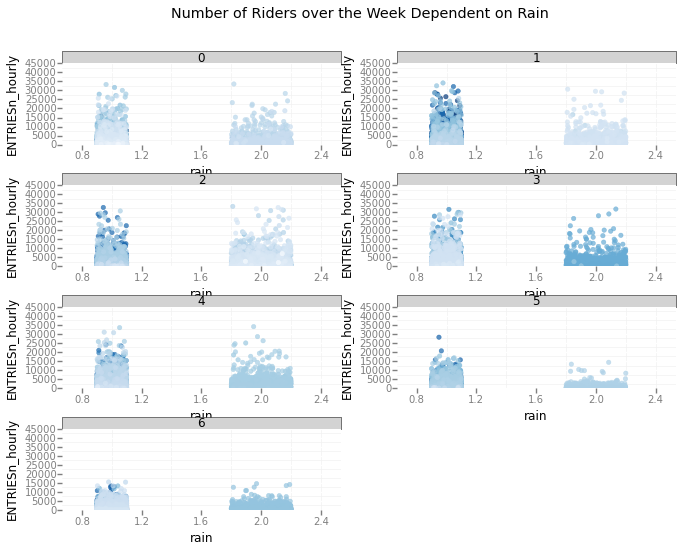

<ggplot: (35601289)>

In [23]:
p = ggplot(aes(x = 'rain', y='ENTRIESn_hourly', color = "meantempi"), data=weather_data)
p + geom_point(position = "jitter", alpha = 0.7) +  scale_y_continuous(limits = [0,45000]) + theme_bw() + \
    facet_wrap('day_week', nrow = 4) + ggtitle("Number of Riders over the Week Dependent on Rain")

#### c) Number of Riders over the Day Dependent on Fog

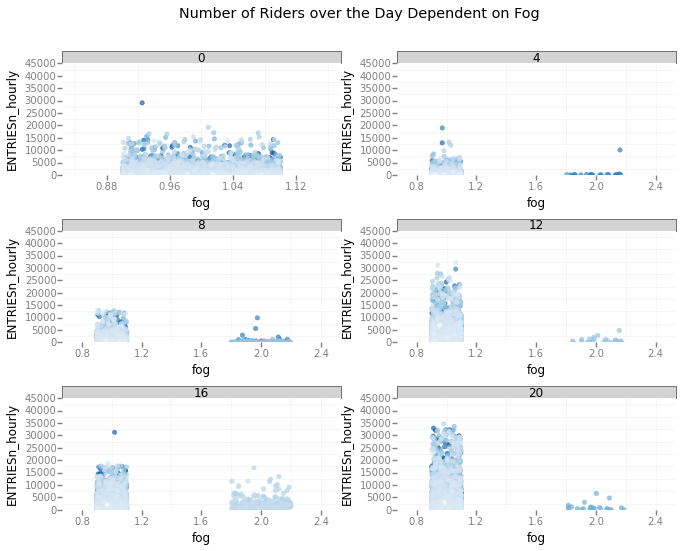

<ggplot: (38316972)>

In [22]:
p = ggplot(aes(x = 'fog', y='ENTRIESn_hourly', color = "meantempi"), data=weather_data)
p + geom_point(position = "jitter", alpha = 0.7) +  scale_y_continuous(limits = [0,45000]) + \
    facet_wrap('hour') + ggtitle("Number of Riders over the Day Dependent on Fog") + theme_bw()

### A.3 Test of Normal Distribution

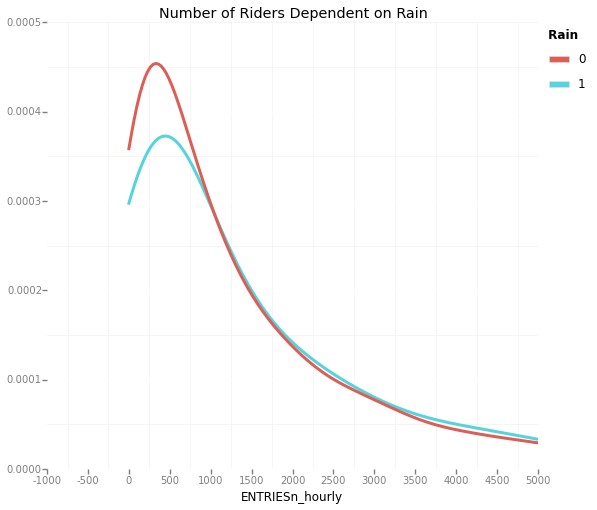

<ggplot: (117874534)>

In [89]:
p = ggplot(aes(x = 'ENTRIESn_hourly', color = 'rain'), data=weather_data)
p + geom_density(size = 3, alpha = 0.25) + theme_bw() + \
    scale_x_continuous(limits = [-1000,5000]) + ggtitle("Number of Riders Dependent on Rain")

Based on the plot, the sample of entries does not seem normally distributed. Hence, the Mann-Whitney-Wilcoxon RankSum test (no assumptions about any underlying distributions, equivalent to Mann-Whitney-U test) is conducted to test if the two samples of the number of entries in the NYC subway on rainy and non rainy days come from the same population:

Null Hypothesis H0: The sample of the number of entries in the NYC subway on rainy days $F_{rain}(x)$ comes from the identical ditribution of the population as the sample for non rainy days $F_{no-rain}(x-a)$ and a = 0.

Alternative Hypothesis H1: The samples have not the identical underlying distribution of the population, hence a $\neq$ 0

The p critical value $\alpha = 1\%$.

In [29]:
no_rain = weather_data["ENTRIESn_hourly"][weather_data["rain"]==0].dropna() 
with_rain = weather_data["ENTRIESn_hourly"][weather_data["rain"]==1].dropna() 

print "Mean Entries Hourly No Rain: ", np.mean(no_rain)
print "Mean Entries Hourly With Rain: ", np.mean(with_rain)
    
z, pval = sc.stats.ranksums(no_rain, with_rain)

print "Mann-Whitney-Wilcoxon RankSum test statistic z for entries on rainy and non rainy days: ", z 
print "Mann-Whitney-Wilcoxon RankSum p-value for entries on rainy and non rainy days: ", pval  

Mean Entries Hourly No Rain:  1845.53943866
Mean Entries Hourly With Rain:  2028.19603547
Mann-Whitney-Wilcoxon RankSum test statistic z for entries on rainy and non rainy days:  -4.54541569645
Mann-Whitney-Wilcoxon RankSum p-value for entries on rainy and non rainy days:  5.48269387142e-06


The p-value is smaller than $\alpha = 1\%$, hence the null hypothesis is rejected. It is very unlikely that the two samples have the same underlying distribution and the same mean value of hourly entries for rainy and non rainy days.

### A.4 Linear Regression

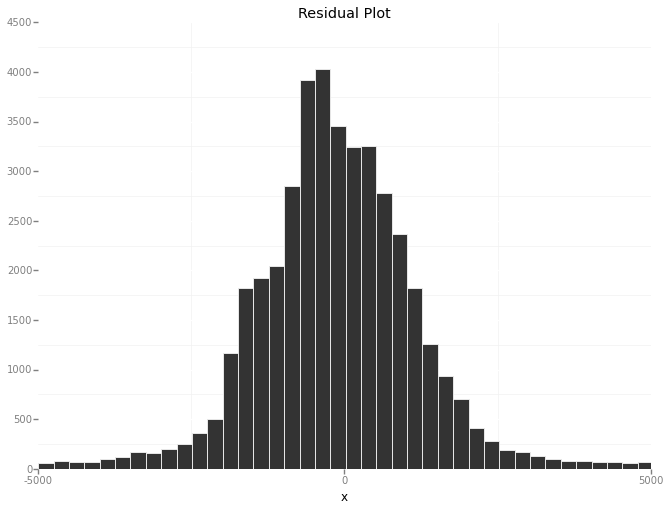

<ggplot: (73072051)>

In [11]:
def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    
    This can be the same code as in the lesson #3 exercise.
    """
    
    ###########################
    ### YOUR CODE GOES HERE ###
    ###########################
    
    features = np.asarray(features)
    values = np.asarray(values)
    
    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    
    intercept = results.params[0]
    params = results.params[1:]
    
    return intercept, params

features = weather_data[['rain']]
# 'meanprecipi', 'meanpressurei', 'meantempi', 'meanwspdi', 'fog'
dummy_units = pd.get_dummies(weather_data['UNIT'], prefix='unit')
dummy2 = pd.get_dummies(weather_data['hour'], prefix='hour')
dummy3 = pd.get_dummies(weather_data['day_week'], prefix='weekday')
features = features.join(dummy_units)
features = features.join(dummy2)
features = features.join(dummy3)
    
# Values
values = weather_data['ENTRIESn_hourly']

# Perform linear regression
intercept, params = linear_regression(features, values)
    
predictions = intercept + np.dot(features, params)

diff = pd.DataFrame.from_items([('x', values - predictions)])

p = ggplot(aes(x = 'x'), data = diff)
p + geom_histogram(binwidth = 250) + theme_bw() + \
    scale_x_continuous(limits = [-5000,5000]) + ggtitle("Residual Plot")


In [34]:
y = np.mean(values)
    
r_squared = 1- (np.sum((values-predictions)**2))/(np.sum((values-y)**2))

print r_squared

0.54399611227


### A.5 Comparison of Predictions and Actual Values

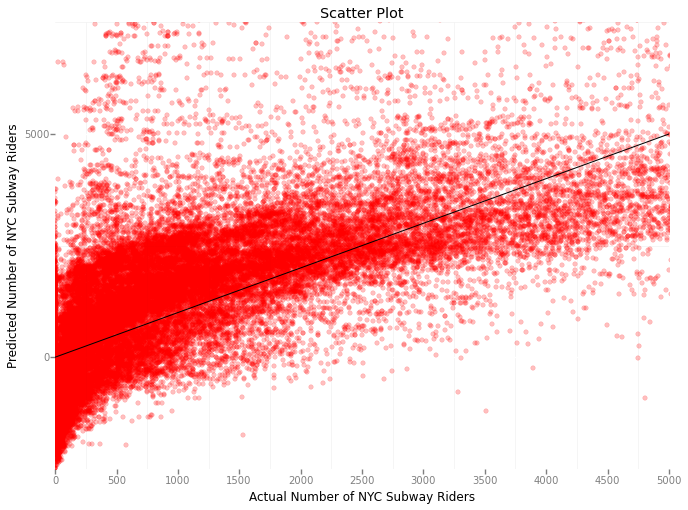

<ggplot: (64634235)>

In [36]:
jit = pd.DataFrame.from_items([('val', values), ('pred', predictions)])

lin = lambda t, a,b: t * a + b

p = ggplot(aes(x = 'val', y = 'pred'), data = jit)
p + geom_jitter(alpha = 0.25, color = 'red') + theme_bw() + scale_y_continuous(limits = [-2500,7500]) +\
    scale_x_continuous(limits = [0,5000]) + ggtitle("Scatter Plot") + stat_function(fun=lin, args=[1, 0] ) +\
    xlab("Actual Number of NYC Subway Riders") + ylab("Predicted Number of NYC Subway Riders")